In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("car_prices.csv")
df.head()

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928
3,A004,108694,12454
4,A005,124879,6634


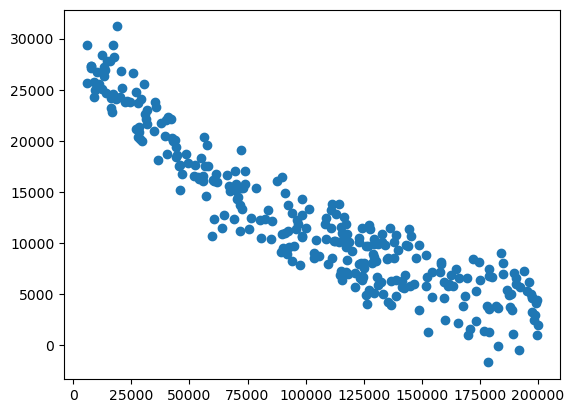

In [3]:
from matplotlib import pyplot as plt
plt.scatter(df.mileage,df.selling_price)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X = df[['mileage']]
y = df['selling_price']

X_train,X_test,y_train,y_test=train_test_split(X,y)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_ply = poly.transform(X_test)

In [7]:
X_train[:5]

,mileage
167,184997
274,116472
126,29538
198,123451
3,108694


In [8]:
X_train_poly[:5]

array([[1.00000000e+00, 1.84997000e+05, 3.42238900e+10],
       [1.00000000e+00, 1.16472000e+05, 1.35657268e+10],
       [1.00000000e+00, 2.95380000e+04, 8.72493444e+08],
       [1.00000000e+00, 1.23451000e+05, 1.52401494e+10],
       [1.00000000e+00, 1.08694000e+05, 1.18143856e+10]])

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train_poly,y_train)
model.score(X_test_ply,y_test)

0.9385410502668142

In [13]:
y_pred = model.predict(X_test_ply)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse,r2

(3659732.0865120334, 0.9385410502668142)

In [14]:
X_range =np.linspace(X['mileage'].min(), X['mileage'].max(), 300).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_range_predict = model.predict(X_range_poly)

D:\kk\New folder\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


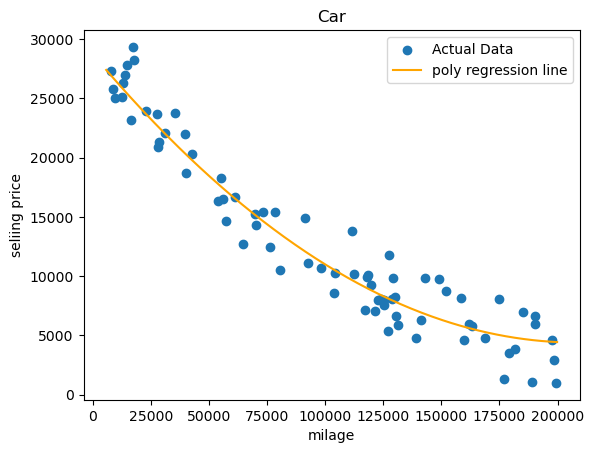

In [20]:
plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_range,y_range_predict,color='orange', label="poly regression line")
plt.title("Car")
plt.xlabel("milage")
plt.ylabel("seliing price")
plt.legend()
plt.show()
        